# VISUALISATION NOTEBOOK
Notebook created for 28.11 meeting figures and data

In [180]:
import pandas as pd
import pickle
import random
import numpy as np
# Let's look at making the FAQ list better
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from joblib import load, dump

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
faq_path = '/Users/margheritarosnati/Documents/DS/2018-2/DSLab/DSL2018-Proj-ETH-IT/data/11-24-faq_dat_cleaned.csv'
tix_path = '/Users/margheritarosnati/Documents/DS/2018-2/DSLab/DSL2018-Proj-ETH-IT/data/11-24-ticket_dat.csv'

In [3]:
ticket_dat = pd.read_csv(tix_path)
faq_dat = pd.read_csv(faq_path)

In [12]:
print(ticket_dat.shape, faq_dat.shape )
# we'll have to work on these two at some point (soon!)
ticket_dat.fillna('', inplace=True)
faq_dat.fillna('', inplace=True)

(4250, 7) (277, 7)


In [128]:
# Create data lists
faq_ques = list(faq_dat.question)
n_faq_ques = len(faq_ques)

faq_ans = list(faq_dat.answer_title + " " + faq_dat.answer)
n_faq_ans = len(faq_ans)

ticket_ques = list(ticket_dat.question)
n_ticket_ques = len(ticket_ques)

ticket_ans = list(ticket_dat.answer)
n_ticket_ans = len(ticket_ans)

In [15]:
print( len(faq_ans), len(ticket_ans))

277 4250


In [18]:
# initialise model
TFiDF = TfidfVectorizer(strip_accents='unicode', lowercase=True,analyzer='word')
# create matrix: rows = all ans; cols = TI-IDF weighted word vector
all_ans = list(faq_ans) + list(ticket_ans)
TFiDF.fit(all_ans)
faq_mat = TFiDF.transform(faq_ans)
tix_mat = TFiDF.transform(ticket_ans)
# DEBUG:
print(faq_mat.shape,tix_mat.shape, len(faq_ans), len(ticket_ans), len(all_ans))

(277, 15926) (4250, 15926) 277 4250 4527


In [20]:
# Calculate similarities between faq ans and ticket ans
SM = cosine_similarity(faq_mat, tix_mat)

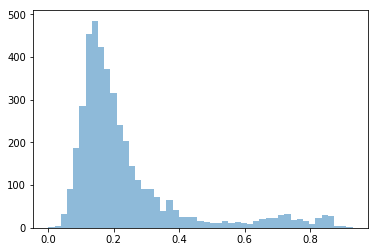

In [22]:
# take highest scoring FAQ per ticket
# plot similarity distribution
strength_FAQ_ticket = np.max(SM, axis=0)
bins =  np.linspace(0, max(strength_FAQ_ticket),50)
plt.hist(strength_FAQ_ticket, bins,alpha=.5, range=(0,1))
plt.show()

In [30]:
# some stats:
thres = np.asarray([0.5, 0.3, 0.2, 0.1])
denom = len(strength_FAQ_ticket)
print([round(np.sum(strength_FAQ_ticket>i)/denom,2) for i in thres])

[0.09, 0.19, 0.4, 0.91]


In [31]:
# VISUALISATION
FAQ_per_ticket = np.argmax(SM, axis=0)
#unique, counts = np.unique(FAQ_per_ticket, return_counts=True)

In [95]:
# creating some samples
subspace =np.nonzero(strength_FAQ_ticket<0.2)
a = random.sample(list(subspace[0]), 1)[0]
b = FAQ_per_ticket[a] 

In [177]:
# Looking at samples created
print("Similarity score: ", strength_FAQ_ticket[a], '\t\t[',a,',',b,'],')
print('\nTicket: ques:\t', ticket_ques[a], '\n\ntick_ans:\t', ticket_ans[a])
#print('\n\nFAQ: ques:\t', faq_ques[b], '\n\nFAQ_ans:\t', faq_ans[b])

Similarity score:  0.5705116806662902 		[ 299 , 171 ],

Ticket: ques:	 Good day For a few days my Oulook loses the connection to the server and I have to close and reopen Oulook. Could you please check why that might be? Thank you very much Sybille ZimmermannGood day The number is 10164. Many thanks and best regards Sybille ZimmermannHoi Stefan Yes the opening and closing does not take long but mails that are open and not sent can not be saved, so I had to cache a few times the text in a word L. Janu, I hope there is a solution soon. See you tomorrow morning anyway anyway with me. LG Sybille 

tick_ans:	 Dear Mrs. Sybille Zimmermann Etzweiler Could you tell us your number? It should be printed on a blue sign with the inscription &quot;Betriebinformatik&quot; or &quot;ETH Zurich ID Services Delivery&quot;. Your ID team Rudolf FriederichDear Sybille, A support ticket has been opened for your request. We will process your request as soon as possible. If you have any further questions, ple

In [176]:
[a,b] = samples[50]

In [98]:
# samples in 29.11 presentation
samples = {
    50:[299, 171],
    30:[ 2613 , 12 ],
    20: [ 61 , 172 ],
    'vals': [57,31,13]
}

In [103]:
# allocate <50% sim to -1
med = np.median(strength_FAQ_ticket)
# to give you a feel:
print(np.median(SM), np.median(strength_FAQ_ticket))

0.037441657171690436 0.17883005550064696


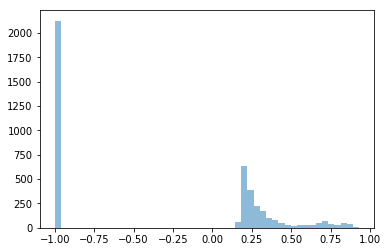

In [110]:
# try I: med over all similarities
# look at distribution
sf2t = np.copy(strength_FAQ_ticket)
sf2t[sft2<med] = -1
f2t = np.copy(FAQ_per_ticket)
f2t[sft2<med] = -1
bins =  np.linspace(-1, max(strength_FAQ_ticket),50)
plt.hist(sf2t, bins,alpha=.5)
plt.show()

In [183]:
# let's look at the distribution over FAQs
# I saved the output of the RF here:
RF_out = load('/Users/margheritarosnati/Desktop/temp.joblib')

((4250,), (4250,))

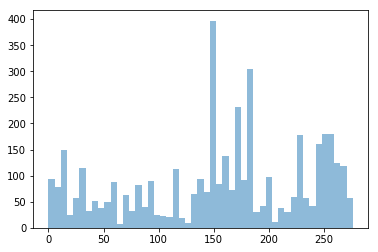

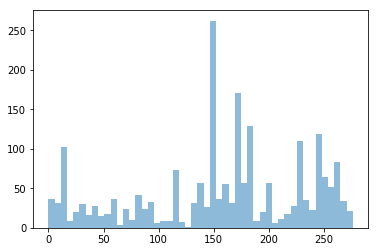

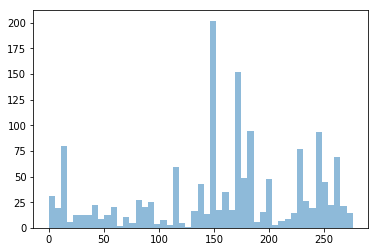

In [184]:
bins =  np.linspace(0, max(FAQ_per_ticket))
plt.hist(FAQ_per_ticket, bins,alpha=.5)
plt.show()
plt.hist(f2t, bins,alpha=.5)
plt.show()
plt.hist(RF_out, bins,alpha=.5)
plt.show()

In [111]:
unique, counts = np.unique(FAQ_per_ticket, return_counts=True)
u2, c2 = np.unique(f2t, return_counts=True)

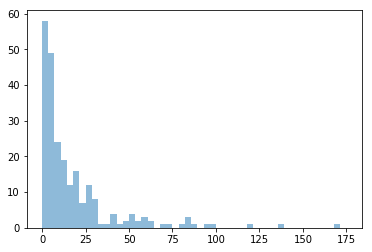

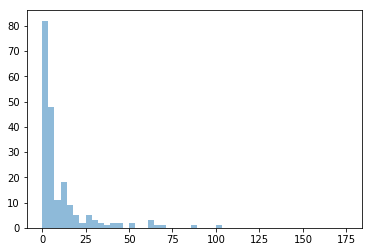

In [116]:
bins =  np.linspace(0, 175,50)
plt.hist(counts, bins,alpha=.5)
plt.show()
plt.hist(c2, bins,alpha=.5)
plt.show()

In [ ]:
# next steps: check what the low ones are getting associated to: is it justified or not?